## Plotting Recent Weather data

Let's take a look at the recent temperature.

In [26]:
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np

In [27]:
# Open file from the NCEP site
file = 'http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis/surface/air.sig995.2021.nc'
ds = xr.open_dataset(file)

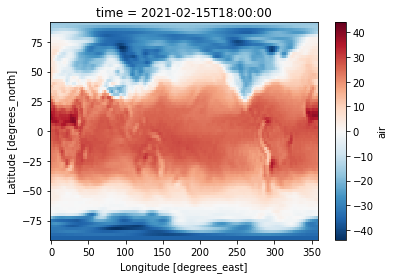

In [28]:
tc=ds.air-273.15  # convert to C
tc.isel(time=-1).plot() # plot the last time step.

/Users/jungeunl/miniconda3/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)


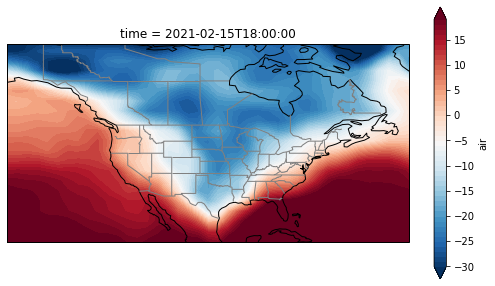

In [29]:
# Make a nice figure
import cartopy.feature as cfeature
lev1=np.arange(-30,20,1)
proj = ccrs.PlateCarree()
import cartopy

fig = plt.figure(figsize=(9,5))
ax = plt.axes(projection=ccrs.PlateCarree())
tc.isel(time=-1).plot.contourf(ax=ax, transform=ccrs.PlateCarree(),levels=lev1)
ax.coastlines()

# Plot only over North America
ax.set_extent([-150, -50, 20, 60])

# Add state boundary
states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')

ax.add_feature(states_provinces, edgecolor='gray')  # Add states
ax.add_feature(cfeature.BORDERS, edgecolor='gray')  # Add borders

## Austin Temperature
Latitude and longitude of Austin: 30.2672° N, 97.7431° W

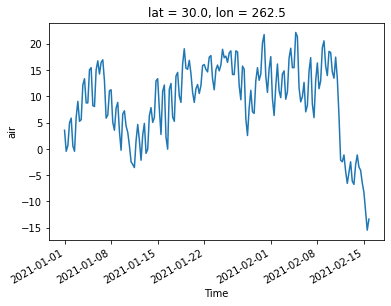

In [39]:
lat_astn=30.3
lon_astn=-97.7+360
tc.sel(lat=lat_astn,lon=lon_astn, method='nearest').plot()

Let's plot temperature for Providence.

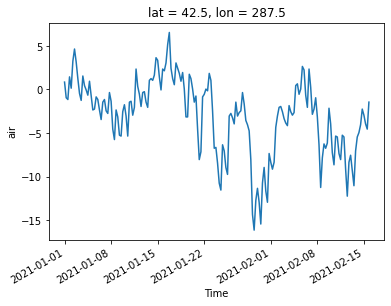

In [32]:
lat_pvd=41.8
lon_pvd=-71.4+360
tc.sel(lat=lat_pvd,lon=lon_pvd , method='nearest').plot()